(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1
[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]
Confusion Matrix: 
[[57  4]
 [ 4 35]]
Accuracy of the Model: 92.0%
Enter Age: 50
Enter Salary: 456024
[1]
Will Buy the Product


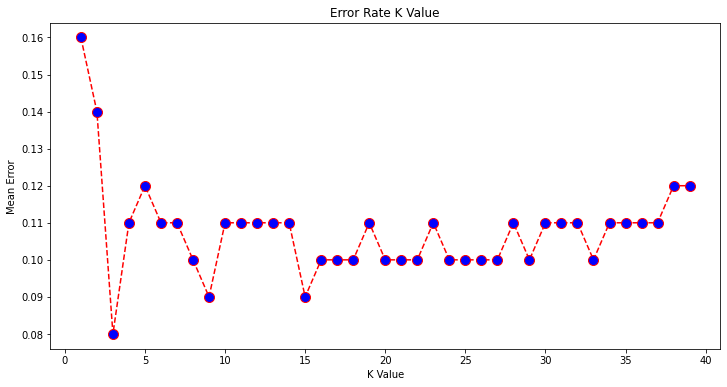

In [1]:

import pandas as pd 
import numpy as np 

data = pd.read_csv('/content/DigitalAd_dataset.csv')

print(data.shape)
print(data.head(5))

X = data.iloc[:, :-1].values
X

Y = data.iloc[:, -1].values
Y

"""### *Splitting Dataset into Train & Test*"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

"""### *Finding the Best K-Value*"""

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

"""### *Training*"""

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

"""### *Evaluating Model - CONFUSION MATRIX*"""

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))




age = int(input("Enter Age: "))
salary = int(input("Enter Salary: "))

newEmp = [[age,salary]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Will Buy the Product")
else:
  print("Will Not Buy the Product")

